In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
amazon_stock_data = pd.read_csv('/kaggle/input/amazon-stock-price-from-1999-to-2022/AMZN_data_1999_2022.csv')

In [3]:
amazon_stock_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1999-01-04,2.730729,2.966667,2.665625,2.957813,2.957813,785844000
1,1999-01-05,2.739063,3.243750,2.662500,3.112500,3.112500,1257464000
2,1999-01-06,3.409375,3.509375,3.350000,3.450000,3.450000,723532000
3,1999-01-07,3.428125,4.006250,3.325000,3.971875,3.971875,945492000
4,1999-01-08,4.606250,4.978125,3.800000,4.006250,4.006250,1333244000


In [4]:
amazon_stock_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
6034,2022-12-23,83.250000,85.779999,82.930000,85.250000,85.250000,57433700
6035,2022-12-27,84.970001,85.349998,83.000000,83.040001,83.040001,57284000
6036,2022-12-28,82.800003,83.480003,81.690002,81.820000,81.820000,58228600
6037,2022-12-29,82.870003,84.550003,82.550003,84.180000,84.180000,54995900
6038,2022-12-30,83.120003,84.050003,82.470001,84.000000,84.000000,62401200


In [5]:
amazon_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6039 entries, 0 to 6038
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6039 non-null   object 
 1   Open       6039 non-null   float64
 2   High       6039 non-null   float64
 3   Low        6039 non-null   float64
 4   Close      6039 non-null   float64
 5   Adj Close  6039 non-null   float64
 6   Volume     6039 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 330.4+ KB


In [6]:
amazon_stock_data['Date'] = pd.to_datetime(amazon_stock_data['Date'])

In [7]:
amazon_stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6039 entries, 0 to 6038
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6039 non-null   datetime64[ns]
 1   Open       6039 non-null   float64       
 2   High       6039 non-null   float64       
 3   Low        6039 non-null   float64       
 4   Close      6039 non-null   float64       
 5   Adj Close  6039 non-null   float64       
 6   Volume     6039 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 330.4 KB


Text(0, 0.5, 'Closing Price')

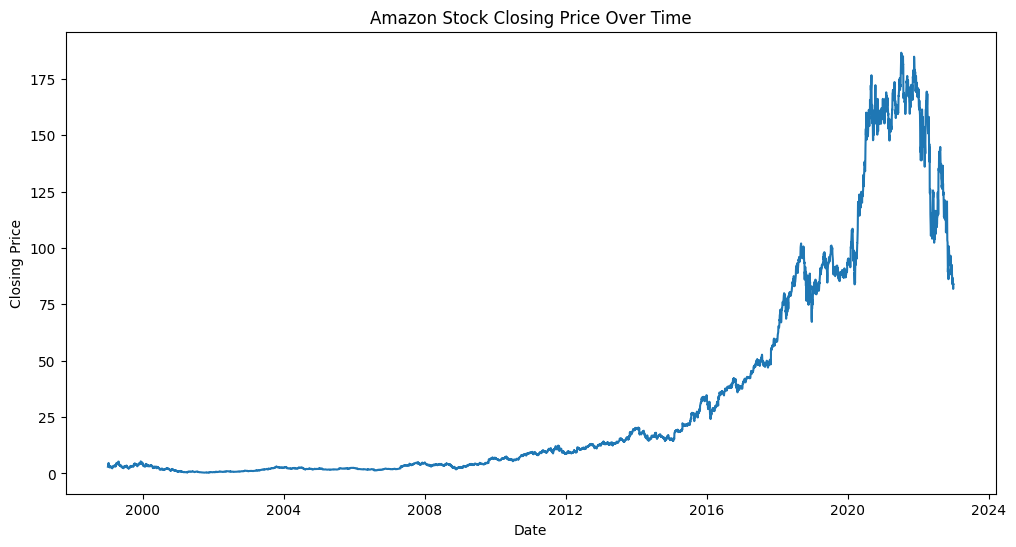

In [8]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=amazon_stock_data, x='Date', y='Close')
plt.title("Amazon Stock Closing Price Over Time")
plt.ylabel('Closing Price')

Text(0, 0.5, 'Opening Price')

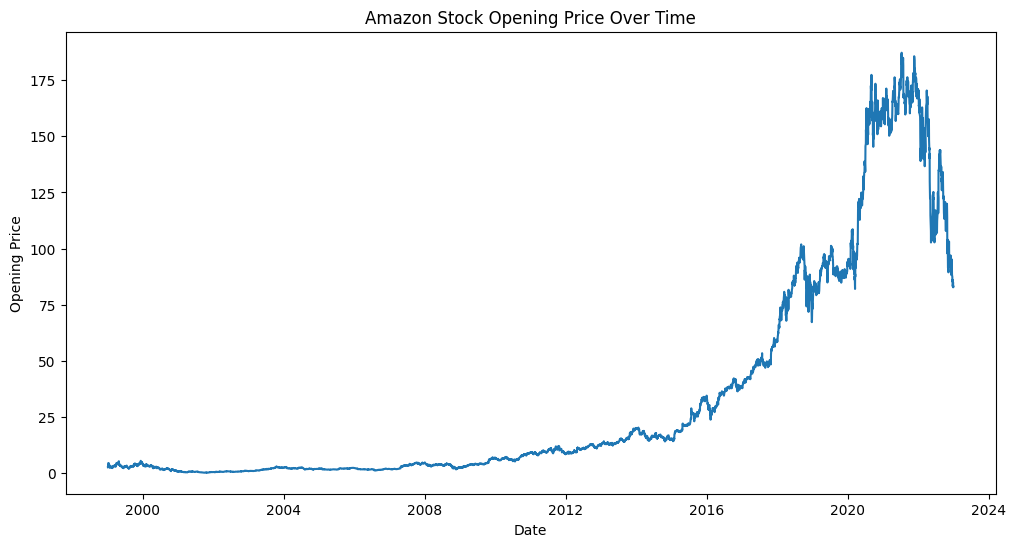

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=amazon_stock_data, x='Date', y='Open')
plt.title("Amazon Stock Opening Price Over Time")
plt.ylabel('Opening Price')

Text(0, 0.5, 'High Price')

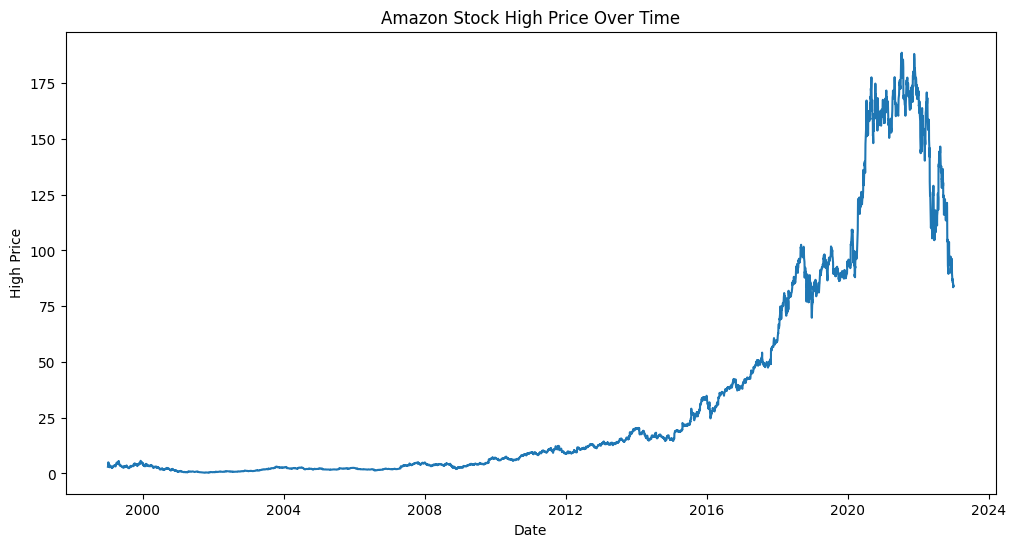

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=amazon_stock_data, x='Date', y='High')
plt.title("Amazon Stock High Price Over Time")
plt.ylabel('High Price')

Text(0, 0.5, 'Low Price')

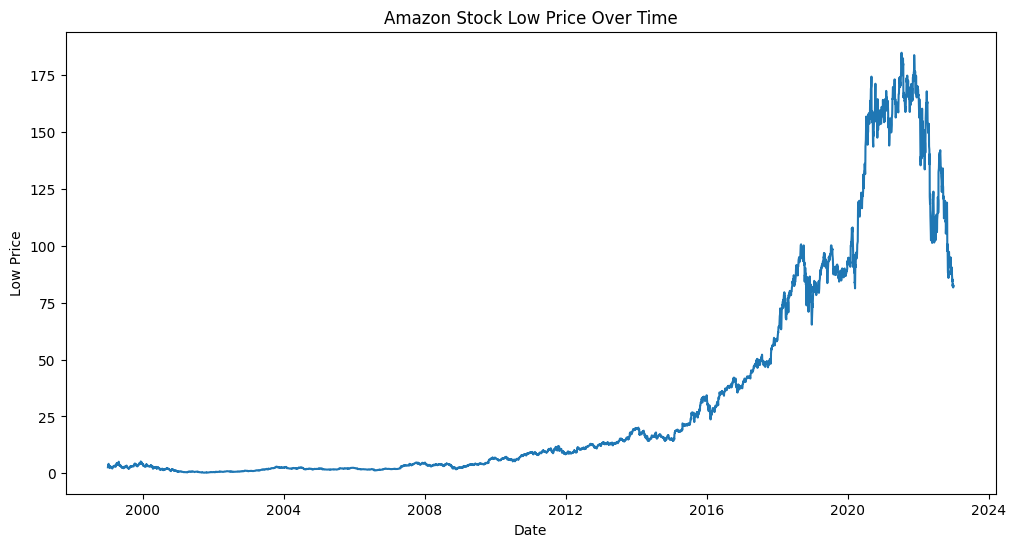

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=amazon_stock_data, x='Date', y='Low')
plt.title("Amazon Stock Low Price Over Time")
plt.ylabel('Low Price')

In [12]:
amazon_stock_data.set_index('Date', inplace=True)

In [13]:
weekly_volume = amazon_stock_data['Volume'].resample('W').sum()
weekly_volume

Date
1999-01-10    5045576000
1999-01-17    2685752000
1999-01-24    2655092000
1999-01-31    2540556000
1999-02-07    1296724000
                 ...    
2022-12-04     384300600
2022-12-11     355830400
2022-12-18     463456800
2022-12-25     356012000
2023-01-01     232909700
Freq: W-SUN, Name: Volume, Length: 1252, dtype: int64

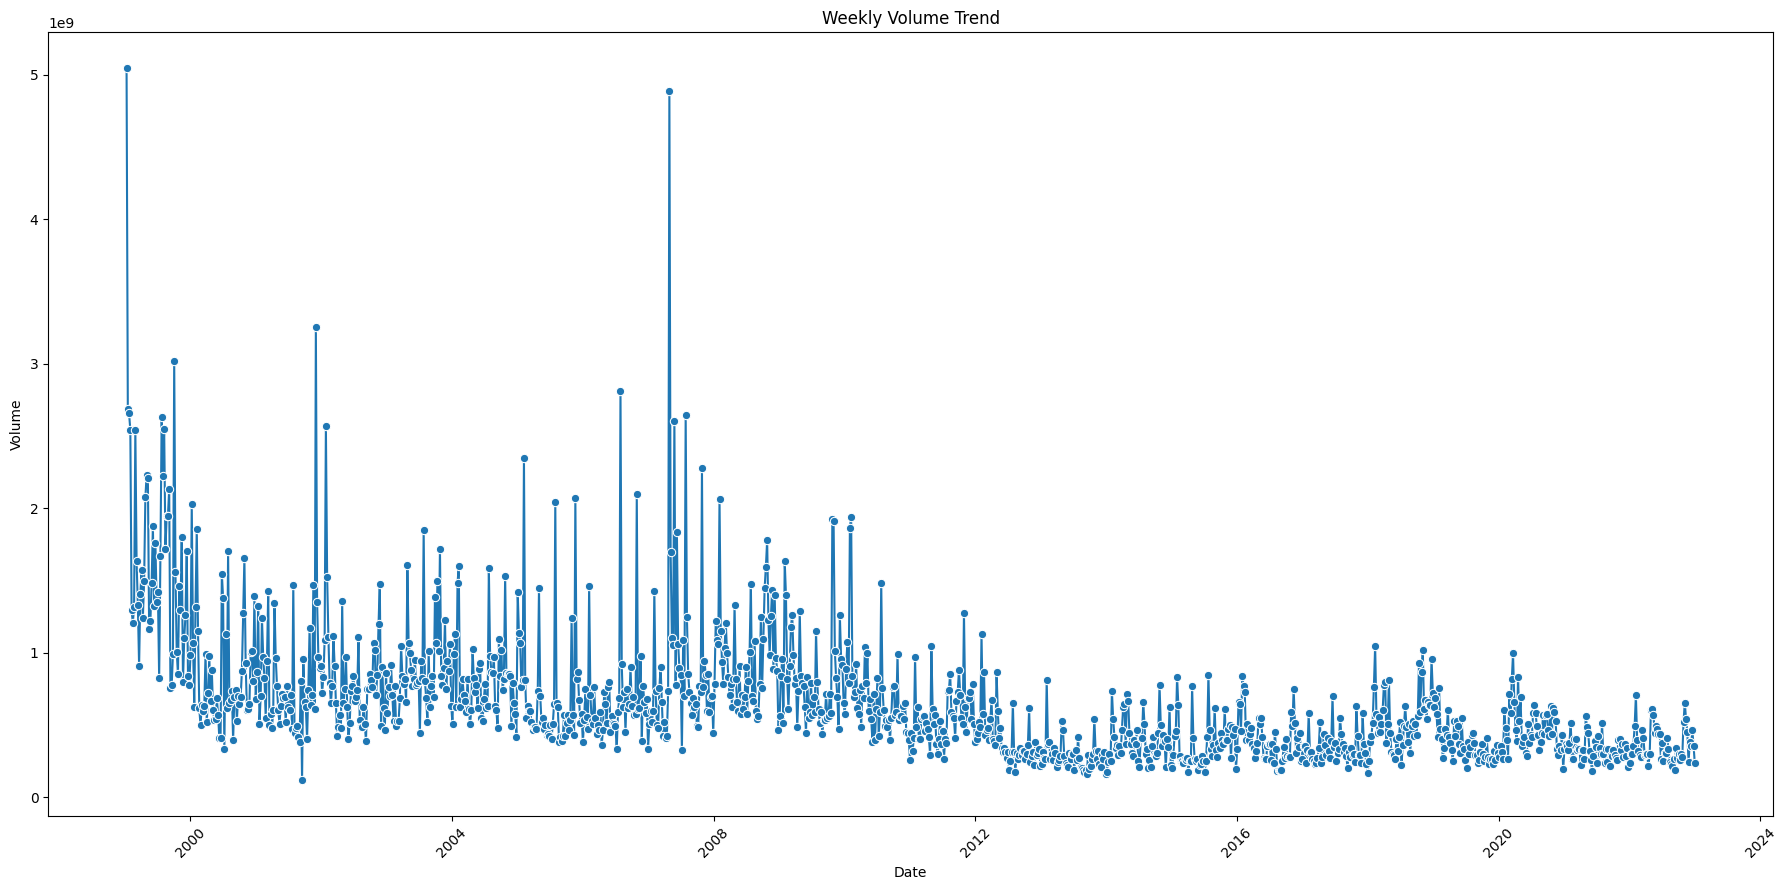

In [14]:
plt.figure(figsize=(18, 9))
sns.lineplot(x=weekly_volume.index, y=weekly_volume.values, marker='o')

plt.title('Weekly Volume Trend')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

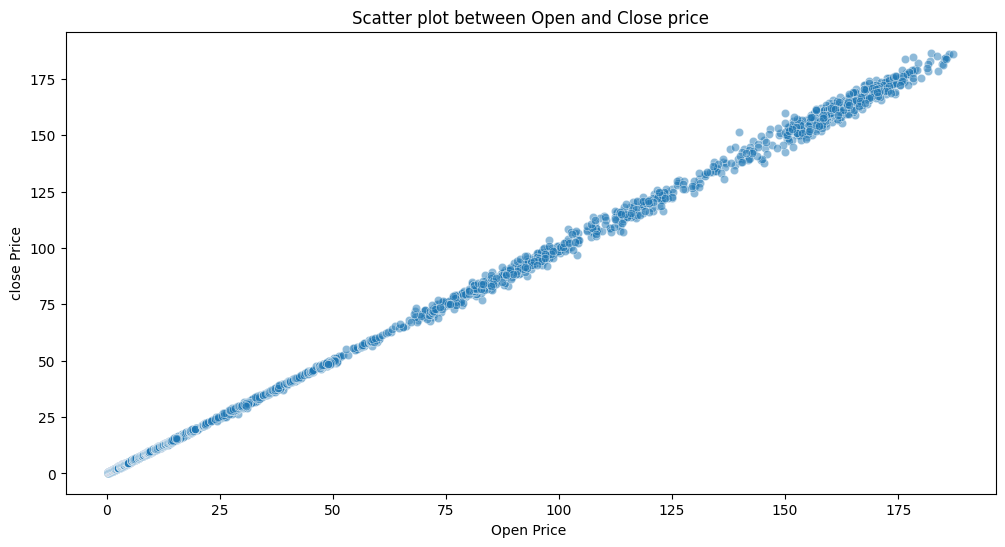

In [15]:
plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'Open', y = "Close", alpha = 0.5, data = amazon_stock_data)
plt.title("Scatter plot between Open and Close price")
plt.xlabel("Open Price ")
plt.ylabel("close Price")
plt.show()


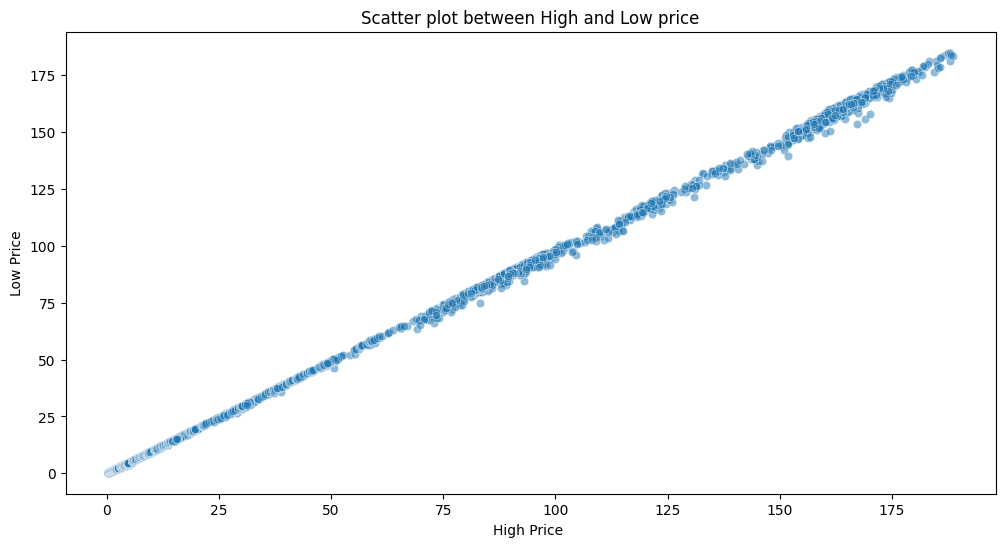

In [16]:

plt.figure(figsize = (12, 6))
sns.scatterplot(x = 'High', y = "Low", alpha = 0.5, data = amazon_stock_data)

plt.title("Scatter plot between High and Low price")
plt.xlabel("High Price ")
plt.ylabel("Low Price")
plt.show()

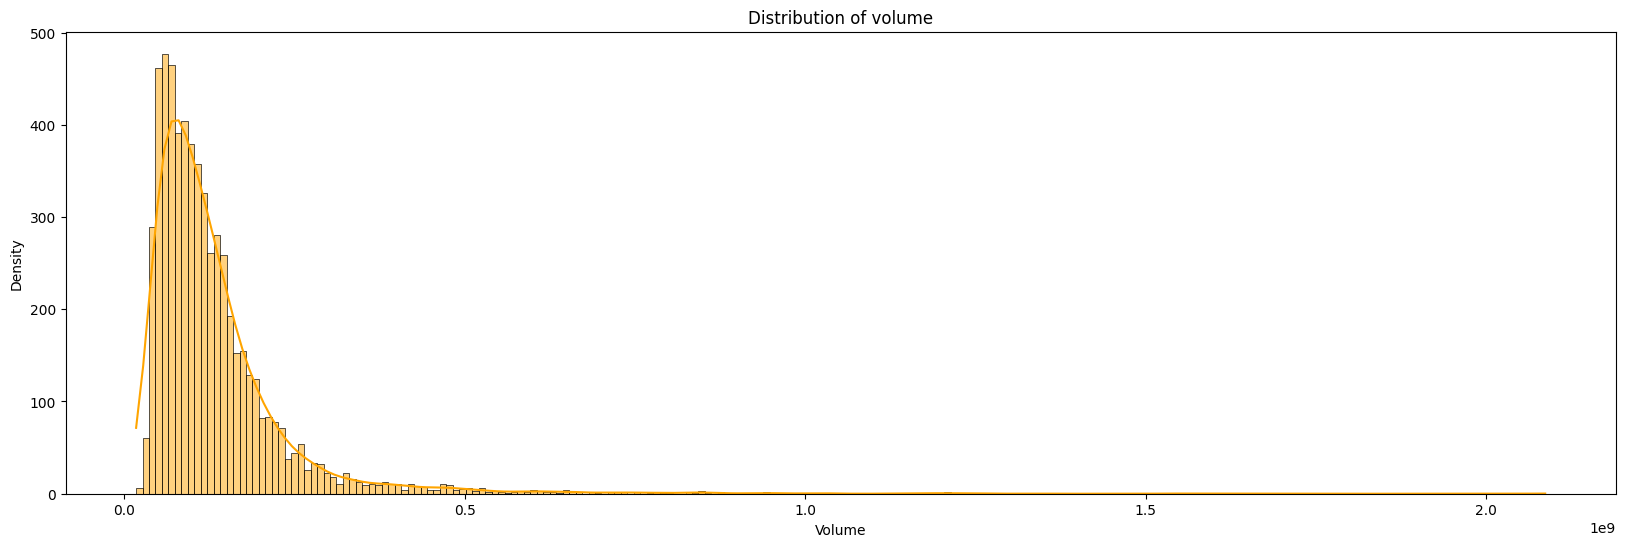

In [17]:
plt.figure(figsize = (20, 6))
sns.histplot(amazon_stock_data['Volume'], kde = True, color = 'orange' )
plt.title("Distribution of volume")
plt.xlabel("Volume")
plt.ylabel("Density")
plt.show()

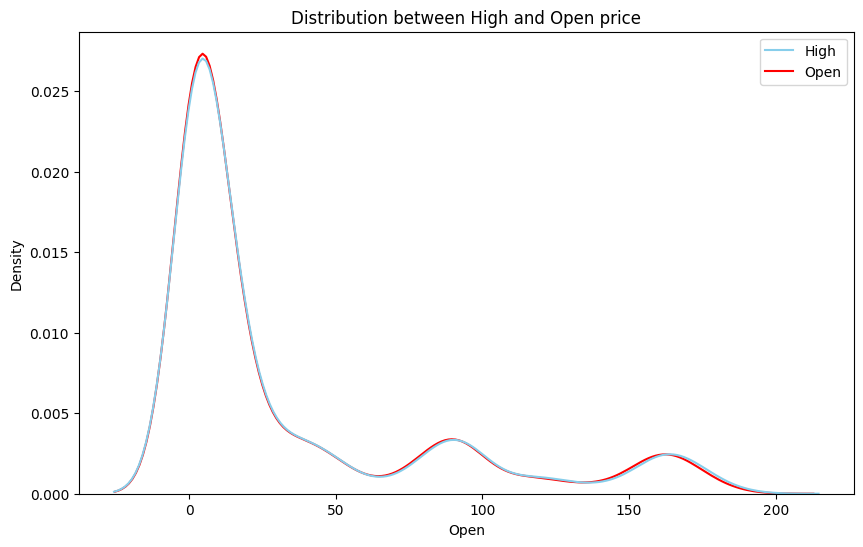

In [18]:
plt.figure(figsize = (10, 6))

sns.kdeplot(data = amazon_stock_data[['High', 'Open']], fill = False, common_norm = False, palette= ['skyblue', 'red'] )

plt.title("Distribution between High and Open price")
plt.xlabel("Open")
plt.ylabel("Density")
plt.show()

In [19]:
amazon_stock_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

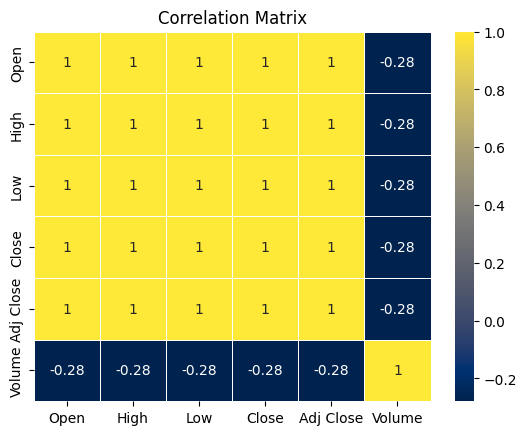

In [20]:
correlation_matrix = amazon_stock_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()